# Fine-Tuning a Semantic Segmentation Model on a Custom Dataset and Usage via the Inference API


Basado en: _[Sergio Paniego](https://github.com/sergiopaniego)_

_(Descripción original)_

In this notebook, we will walk through the process of fine-tuning a [semantic segmentation](https://huggingface.co/tasks/image-segmentation) model on a custom dataset. The model we'll be using is the pretrained [Segformer](https://huggingface.co/docs/transformers/model_doc/segformer), a powerful and flexible transformer-based architecture for segmentation tasks.

![Segformer architecture](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/segformer_architecture.png)

In [141]:
size = 512
nombre_modelo = 'segformer-200-512'
prepath = '../data/raw/data_set_all_'

In [142]:
path = f'{prepath}{size}/'
print(path)

../data/raw/data_set_all_512/


## Adecuación del dataset

El notebook original fue realizado tomando como base [sidewalk-semantic](https://huggingface.co/datasets/segments/sidewalk-semantic). A continuación se adapta el dataset propio a este formato para evitar incompatibilidades con el modelo a _fine tunnear_.

In [143]:
import os
import json
import pandas as pd
from datasets import DatasetDict, Dataset
from PIL import Image
import numpy as np

import sys
sys.path.append('../utils')

from utils import tabulate_jsons_from_folder, load_image_mask_pairs

In [144]:
metadata_path = '../data/metadata'
jsons = tabulate_jsons_from_folder(f'{path}metadata_y_{size}/')

In [145]:
min_pol=2

In [146]:
jsons = tabulate_jsons_from_folder(f'{path}metadata_y_{size}/')
l1 = jsons[jsons['num_polygons_in_window']>=min_pol]['id']
l0 = jsons[jsons['num_polygons_in_window']==0]['id'].sample(n=int(np.round(len(l1)/5)), random_state=42)
l = pd.concat([l1,l0])
l_train_test = l.sample(frac=0.9, random_state=42)
l_val = l.drop(l_train_test.index)
l_train = l_train_test.sample(frac=0.8, random_state=42)
l_test = l_train_test.drop(l_train.index)

In [149]:
# Carga tus datos
train_data = load_image_mask_pairs(f"{path}dataset_x_{size}/",f"{path}dataset_y_{size}/",l_train)
val_data = load_image_mask_pairs(f"{path}dataset_x_{size}/",f"{path}dataset_y_{size}/",l_val)
test_data = load_image_mask_pairs(f"{path}dataset_x_{size}/",f"{path}dataset_y_{size}/",l_test)

conversión
conversión
conversión
conversión
conversión
conversión
conversión
conversión
conversión
conversión
conversión
conversión
conversión
conversión
conversión
conversión
conversión


In [184]:
# Crea el DatasetDict
dataset = DatasetDict({
    "train": Dataset.from_list(train_data),
    "test": Dataset.from_list(train_data),
    "validation": Dataset.from_list(val_data)
})

Separación en test y train



In [186]:
val_ds = dataset["validation"]
test_ds = dataset['test']
train_ds = dataset['train']


In [ ]:
#val_ds = dataset["test"]
#train_ds = dataset["train"].train_test_split(test_size=0.2)
#test_ds = train_ds['test']
#train_ds = train_ds['train']

## Visualización de ejemplos

In [153]:
import json

filename = "id2label.json"

with open(filename, "r", encoding="utf-8") as f:
    id2label = json.load(f)

#id2label = json.load(open(hf_hub_download(repo_id=sidewalk_dataset_identifier, filename=filename, repo_type="dataset"), "r"))
id2label = {int(k): v for k, v in id2label.items()}
label2id = {v: k for k, v in id2label.items()}

num_labels = len(id2label)
print("Id2label:", id2label)

Id2label: {0: 'unlabeled', 1: 'Block'}


Asignación de colores por clase

In [154]:
sidewalk_palette = [
  [0, 0, 0], # unlabeled
  [216, 82, 24], # flat-road
]

In [ ]:
'''from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.patches as patches

# Create and show the legend separately
fig, ax = plt.subplots(figsize=(18, 2))

legend_patches = [patches.Patch(color=np.array(color)/255, label=label) for label, color in zip(id2label.values(), sidewalk_palette)]

ax.legend(handles=legend_patches, loc='center', bbox_to_anchor=(0.5, 0.5), ncol=5, fontsize=8)
ax.axis('off')

plt.show()

for i in [133,377,288,199]:
    image = train_ds[i]

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Show the original image
    ax[0].imshow(image['pixel_values'])
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    mask_np = np.array(image['label'])

    # Create a new empty RGB image
    colored_mask = np.zeros((mask_np.shape[0], mask_np.shape[1], 3), dtype=np.uint8)

    # Assign colors to each value in the mask
    for label_id, color in enumerate(sidewalk_palette):
        colored_mask[mask_np == label_id] = color

    colored_mask_img = Image.fromarray(colored_mask, 'RGB')

    # Show the segmentation mask
    ax[1].imshow(colored_mask_img)
    ax[1].set_title('Segmentation Mask')
    ax[1].axis('off')

    # Convert the original image to RGBA to support transparency
    image_rgba = image['pixel_values'].convert("RGBA")
    colored_mask_rgba = colored_mask_img.convert("RGBA")

    # Adjust transparency of the mask
    alpha = 128  # Transparency level (0 fully transparent, 255 fully opaque)
    image_2_with_alpha = Image.new("RGBA", colored_mask_rgba.size)
    for x in range(colored_mask_rgba.width):
        for y in range(colored_mask_rgba.height):
            r, g, b, a = colored_mask_rgba.getpixel((x, y))
            image_2_with_alpha.putpixel((x, y), (r, g, b, alpha))

    superposed = Image.alpha_composite(image_rgba, image_2_with_alpha)

    # Show the mask overlay
    ax[2].imshow(superposed)
    ax[2].set_title('Mask Overlay')
    ax[2].axis('off')

    plt.show()'''

'from matplotlib import pyplot as plt\nimport numpy as np\nfrom PIL import Image\nimport matplotlib.patches as patches\n\n# Create and show the legend separately\nfig, ax = plt.subplots(figsize=(18, 2))\n\nlegend_patches = [patches.Patch(color=np.array(color)/255, label=label) for label, color in zip(id2label.values(), sidewalk_palette)]\n\nax.legend(handles=legend_patches, loc=\'center\', bbox_to_anchor=(0.5, 0.5), ncol=5, fontsize=8)\nax.axis(\'off\')\n\nplt.show()\n\nfor i in [133,377,288,199]:\n    image = train_ds[i]\n\n    fig, ax = plt.subplots(1, 3, figsize=(18, 6))\n\n    # Show the original image\n    ax[0].imshow(image[\'pixel_values\'])\n    ax[0].set_title(\'Original Image\')\n    ax[0].axis(\'off\')\n\n    mask_np = np.array(image[\'label\'])\n\n    # Create a new empty RGB image\n    colored_mask = np.zeros((mask_np.shape[0], mask_np.shape[1], 3), dtype=np.uint8)\n\n    # Assign colors to each value in the mask\n    for label_id, color in enumerate(sidewalk_palette):\n  

## Visualización de las clases en el conjunto del dataset

In [156]:
import matplotlib.pyplot as plt
import numpy as np

class_counts = np.zeros(len(id2label))

for example in train_ds:
    mask_np = np.array(example['label'])
    unique, counts = np.unique(mask_np, return_counts=True)
    for u, c in zip(unique, counts):
        class_counts[u] += c

In [157]:
'''from matplotlib import pyplot as plt
import numpy as np
from matplotlib import patches

labels = list(id2label.values())

# Normalize colors to be in the range [0, 1]
normalized_palette = [tuple(c / 255 for c in color) for color in sidewalk_palette]

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(range(len(labels)), class_counts, color=[normalized_palette[i] for i in range(len(labels))])

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90, ha="right")

ax.set_xlabel("Categories", fontsize=14)
ax.set_ylabel("Number of Occurrences", fontsize=14)
ax.set_title("Number of Occurrences by Category", fontsize=16)

ax.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust the y-axis limit
y_max = max(class_counts)
ax.set_ylim(0, y_max * 1.25)

for bar in bars:
    height = int(bar.get_height())
    offset = 10  # Adjust the text location
    ax.text(bar.get_x() + bar.get_width() / 2.0, height + offset, f"{height}",
            ha="center", va="bottom", rotation=90, fontsize=10, color='black')

fig.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=8)  # Adjust ncol as needed

plt.tight_layout()
plt.show()'''

'from matplotlib import pyplot as plt\nimport numpy as np\nfrom matplotlib import patches\n\nlabels = list(id2label.values())\n\n# Normalize colors to be in the range [0, 1]\nnormalized_palette = [tuple(c / 255 for c in color) for color in sidewalk_palette]\n\n# Visualization\nfig, ax = plt.subplots(figsize=(12, 8))\n\nbars = ax.bar(range(len(labels)), class_counts, color=[normalized_palette[i] for i in range(len(labels))])\n\nax.set_xticks(range(len(labels)))\nax.set_xticklabels(labels, rotation=90, ha="right")\n\nax.set_xlabel("Categories", fontsize=14)\nax.set_ylabel("Number of Occurrences", fontsize=14)\nax.set_title("Number of Occurrences by Category", fontsize=16)\n\nax.grid(axis="y", linestyle="--", alpha=0.7)\n\n# Adjust the y-axis limit\ny_max = max(class_counts)\nax.set_ylim(0, y_max * 1.25)\n\nfor bar in bars:\n    height = int(bar.get_height())\n    offset = 10  # Adjust the text location\n    ax.text(bar.get_x() + bar.get_width() / 2.0, height + offset, f"{height}",\n     

## Data Augmentation with Albumentations 

Pendiente de implementar


In [158]:
'''from transformers import SegformerImageProcessor

image_processor = SegformerImageProcessor()

import albumentations as A
albumentations_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.7),
    #A.RandomResizedCrop(height=100, width=100, scale=(0.8, 1.0), ratio=(0.75, 1.33), p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25, p=0.5),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=25, val_shift_limit=20, p=0.5),
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),
    A.GaussNoise(var_limit=(10, 50), p=0.4),
])

def train_transforms(example_batch):
    augmented = [
        albumentations_transform(image=np.array(image), mask=np.array(label))
        for image, label in zip(example_batch['pixel_values'], example_batch['label'])
    ]
    augmented_images = [item['image'] for item in augmented]
    augmented_labels = [item['mask'] for item in augmented]
    inputs = image_processor(augmented_images, augmented_labels)
    return inputs

def val_transforms(example_batch):
    images = [x for x in example_batch['pixel_values']]
    labels = [x for x in example_batch['label']]
    inputs = image_processor(images, labels)
    return inputs


# Set transforms
train_ds.set_transform(train_transforms)
test_ds.set_transform(val_transforms)'''

"from transformers import SegformerImageProcessor\n\nimage_processor = SegformerImageProcessor()\n\nimport albumentations as A\nalbumentations_transform = A.Compose([\n    A.HorizontalFlip(p=0.5),\n    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.7),\n    #A.RandomResizedCrop(height=100, width=100, scale=(0.8, 1.0), ratio=(0.75, 1.33), p=0.5),\n    A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25, p=0.5),\n    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=25, val_shift_limit=20, p=0.5),\n    A.GaussianBlur(blur_limit=(3, 5), p=0.3),\n    A.GaussNoise(var_limit=(10, 50), p=0.4),\n])\n\ndef train_transforms(example_batch):\n    augmented = [\n        albumentations_transform(image=np.array(image), mask=np.array(label))\n        for image, label in zip(example_batch['pixel_values'], example_batch['label'])\n    ]\n    augmented_images = [item['image'] for item in augmented]\n    augmented_labels = [item['mask'] for item in augme

In [159]:
from transformers import SegformerImageProcessor

image_processor = SegformerImageProcessor()

# Sin Albumentations
def train_transforms(example_batch):
    images = [np.array(image) for image in example_batch['pixel_values']]
    labels = [np.array(label) for label in example_batch['label']]
    inputs = image_processor(images, labels)
    return inputs

def val_transforms(example_batch):
    images = [x for x in example_batch['pixel_values']]
    labels = [x for x in example_batch['label']]
    inputs = image_processor(images, labels)
    return inputs

# Set transforms
train_ds.set_transform(train_transforms)
test_ds.set_transform(val_transforms)

In [160]:
from transformers import SegformerForSemanticSegmentation

pretrained_model_name = "nvidia/mit-b0"
model = SegformerForSemanticSegmentation.from_pretrained(
    pretrained_model_name,
    id2label=id2label,
    label2id=label2id
)

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 7. Establecimiento de hiperparámetros


In [161]:
from transformers import TrainingArguments

output_dir = "segformer-finetuned-200"

training_args = TrainingArguments(
    output_dir=output_dir,
    learning_rate=6e-5,
    num_train_epochs=200,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    save_total_limit=2,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_steps=20,
    eval_steps=20,
    logging_steps=1,
    eval_accumulation_steps=1,
    lr_scheduler_type="cosine",
    warmup_ratio=0.1,          
    load_best_model_at_end=True,
    push_to_hub=False,
    report_to=None
)

In [162]:
#import wandb

#wandb.init(
#    project="test-segformer-b0-segments-sidewalk-finetuned",  # change this
#    name="test-segformer-b0-segments-sidewalk-finetuned",  # change this
#    config=training_args,
#)

## 8. Set Custom `compute_metrics` Method for Enhanced Logging with `evaluate`

We will use the [mean Intersection over Union (mean IoU)](https://huggingface.co/spaces/evaluate-metric/mean_iou) as the primary metric to evaluate the model’s performance. This will allow us to track performance across each category in detail.

Additionally, we’ll adjust the logging level of the evaluation module to minimize warnings in the output. If a category is not detected in an image, you might see warnings like the following:

```
RuntimeWarning: invalid value encountered in divide iou = total_area_intersect / total_area_union
```


You can skip this cell if you prefer to see these warnings and proceed to the next step.


In [163]:
import evaluate
evaluate.logging.set_verbosity_error()

In [164]:
import torch
from torch import nn
import multiprocessing

metric = evaluate.load("mean_iou")

def compute_metrics(eval_pred):
  with torch.no_grad():
    logits, labels = eval_pred
    logits_tensor = torch.from_numpy(logits)
    # scale the logits to the size of the label
    logits_tensor = nn.functional.interpolate(
        logits_tensor,
        size=labels.shape[-2:],
        mode="bilinear",
        align_corners=False,
    ).argmax(dim=1)

    # currently using _compute instead of compute: https://github.com/huggingface/evaluate/pull/328#issuecomment-1286866576
    pred_labels = logits_tensor.detach().cpu().numpy()
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", RuntimeWarning)
        metrics = metric._compute(
                predictions=pred_labels,
                references=labels,
                num_labels=len(id2label),
                ignore_index=0,
                reduce_labels=image_processor.do_reduce_labels,
            )

    # add per category metrics as individual key-value pairs
    per_category_accuracy = metrics.pop("per_category_accuracy").tolist()
    per_category_iou = metrics.pop("per_category_iou").tolist()

    metrics.update({f"accuracy_{id2label[i]}": v for i, v in enumerate(per_category_accuracy)})
    metrics.update({f"iou_{id2label[i]}": v for i, v in enumerate(per_category_iou)})

    return metrics

In [165]:
import torch
from torch import nn
import numpy as np
import evaluate

# Carga el métrico de mIoU de Hugging Face
metric = evaluate.load("mean_iou")

def build_compute_metrics(id2label, image_processor, ignore_index=0, compute_precision=True):
    """
    compute_metrics para HF Trainer que devuelve SIEMPRE:
      - mean_iou (mIoU global)
      - recall por clase (renombrado desde per_category_accuracy)
      - iou por clase
      - (opcional) precision por clase
      - macro_recall, macro_precision, f1_macro
    """
    num_labels = len(id2label)

    def compute_metrics(eval_pred):
        with torch.no_grad():
            logits, labels = eval_pred  # labels: numpy (B, H, W)
            logits_tensor = torch.from_numpy(logits)

            # Redimensionar logits a tamaño de labels y tomar argmax (clase por píxel)
            pred = nn.functional.interpolate(
                logits_tensor,
                size=labels.shape[-2:],
                mode="bilinear",
                align_corners=False,
            ).argmax(dim=1)

            pred_np = pred.detach().cpu().numpy()   # (B, H, W)
            labels_np = labels                      # (B, H, W) numpy

            # mIoU semántico con ignore_index
            import warnings
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", RuntimeWarning)
                metrics = metric._compute(
                    predictions=pred_np,
                    references=labels_np,
                    num_labels=num_labels,
                    ignore_index=ignore_index,
                    reduce_labels=getattr(image_processor, "do_reduce_labels", False),
                )

            # Extraer y renombrar resultados por clase
            per_cat_recall = metrics.pop("per_category_accuracy").tolist()  # == recall por clase
            per_cat_iou = metrics.pop("per_category_iou").tolist()

            # Publicar SIEMPRE recall e IoU por clase
            for i, v in enumerate(per_cat_recall):
                metrics[f"recall_{id2label[i]}"] = float(v)
            for i, v in enumerate(per_cat_iou):
                metrics[f"iou_{id2label[i]}"] = float(v)

            # (Opcional) Precision por clase y agregados macro
            if compute_precision:
                # Enmascarar píxeles inválidos
                mask_valid = (labels_np != ignore_index)
                preds_valid = pred_np[mask_valid]
                gts_valid = labels_np[mask_valid]

                per_cat_precision = []
                for c in range(num_labels):
                    tp = np.sum((preds_valid == c) & (gts_valid == c))
                    fp = np.sum((preds_valid == c) & (gts_valid != c))
                    prec = tp / (tp + fp + 1e-12)
                    per_cat_precision.append(prec)
                    metrics[f"precision_{id2label[c]}"] = float(prec)

                macro_recall = float(np.mean(per_cat_recall))
                macro_precision = float(np.mean(per_cat_precision))
                f1_macro = float(2 * macro_precision * macro_recall / (macro_precision + macro_recall + 1e-12))

                metrics["macro_recall"] = macro_recall
                metrics["macro_precision"] = macro_precision
                metrics["f1_macro"] = f1_macro

            # mean_iou ya viene en metrics['mean_iou'] (dejamos el nombre tal cual)
            return metrics
    return compute_metrics



## 9. Train the Model on Our Dataset 🏋

Now it's time to train the model on our custom dataset. We’ll use the prepared training arguments and the connected Weights & Biases integration to monitor the training process and make adjustments as needed. Let’s start the training and watch the model improve its performance!


In [166]:
from transformers import Trainer
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    tokenizer=image_processor,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=30)],
    compute_metrics=compute_metrics,
)

D:\temp\ipykernel_32208\3967264545.py:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [170]:
from transformers import TrainingArguments, Trainer
from transformers import EarlyStoppingCallback


# 2) Define TrainingArguments con evaluación y selección por métrica
training_args = TrainingArguments(
    output_dir="out/segformer",
    eval_strategy="steps",   # o "epoch"
    eval_steps=500,                # ajusta al tamaño de tu dataset
    save_strategy="steps",         # guarda checkpoints sincronizados con eval
    save_steps=500,
    load_best_model_at_end=True,   # carga el mejor al final
    metric_for_best_model="mean_iou",  # puedes usar "mean_iou" si prefieres
    greater_is_better=True,        # True para f1_macro y mean_iou
    logging_steps=100,
    save_total_limit=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    seed=42,
)

# 3) Early stopping basado en la métrica de evaluación
callbacks = [EarlyStoppingCallback(early_stopping_patience=30)]
# Tip: si quieres early stopping más sensible, baja la paciencia (e.g., 10)

# 4) Entrenador
compute_metrics = build_compute_metrics(
    id2label=id2label,
    image_processor=image_processor,
    ignore_index=0,
    compute_precision=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,  # ¡Importante!
    callbacks=[EarlyStoppingCallback(early_stopping_patience=30)],
)

# 5) Entrenar y evaluar
trainer.train()
metrics = trainer.evaluate()
print(metrics)  # contendrá mean_iou, f1_macro, macro_precision, macro_recall y por-clase

D:\temp\ipykernel_32208\3053778866.py:35: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 0.34365150332450867, 'eval_mean_iou': 0.4650524142084809, 'eval_mean_accuracy': 0.9301048284169618, 'eval_overall_accuracy': 0.9301048284169618, 'eval_recall_unlabeled': nan, 'eval_recall_Block': 0.9301048284169618, 'eval_iou_unlabeled': 0.0, 'eval_iou_Block': 0.9301048284169618, 'eval_precision_unlabeled': 0.0, 'eval_precision_Block': 1.0, 'eval_macro_recall': nan, 'eval_macro_precision': 0.5, 'eval_f1_macro': nan, 'eval_runtime': 0.1717, 'eval_samples_per_second': 17.469, 'eval_steps_per_second': 5.823, 'epoch': 5.0}


Todos los checkpoints: ['checkpoint-15']
Último checkpoint: checkpoint-15
output dir: D:/Github/Block-Detection/SegFormer/out/segformer/checkpoint-15


In [168]:
compute_metrics

<function __main__.build_compute_metrics.<locals>.compute_metrics(eval_pred)>

In [122]:
display(compute_metrics)

None

In [ ]:
trainer.train()
import pickle

with open(nombre_modelo, "wb") as archivo:
    pickle.dump(trainer, archivo)

In [ ]:
metrics = trainer.evaluate(val_ds)
print(metrics)

{'eval_loss': 0.38096383213996887, 'eval_mean_iou': 0.36776184016827385, 'eval_mean_accuracy': 0.7355236803365477, 'eval_overall_accuracy': 0.7355236803365477, 'eval_accuracy_unlabeled': nan, 'eval_accuracy_Block': 0.7355236803365477, 'eval_iou_unlabeled': 0.0, 'eval_iou_Block': 0.7355236803365477, 'eval_runtime': 7.2452, 'eval_samples_per_second': 18.771, 'eval_steps_per_second': 2.346, 'epoch': 20.0}


In [127]:
print("compute_metrics =", compute_metrics)
print("type:", type(compute_metrics))
print("callable?:", callable(compute_metrics))

compute_metrics = None
type: <class 'NoneType'>
callable?: False


# HASTA ACÁ ESTÁ BIEN QUE CORRA, PUSHEA EL REPO Y YO ME ENCARGO

## 10. Evaluate Model Performance on New Images 📸

After training, we’ll assess the model’s performance on new images. We’ll use a test image and leverage a [pipeline](https://huggingface.co/docs/transformers/main_classes/pipelines) to evaluate how well the model performs on unseen data.


In [14]:
from PIL import Image
import numpy as np
import torch
from transformers import AutoImageProcessor

checkpoint_path = r"D:\Github\Block-Detection\SegFormer\out\segformer\checkpoint-15"

image_processor = AutoImageProcessor.from_pretrained(checkpoint_path)

ignore_index = 0  # ajusta si tu void/unlabeled es otro ID
# Si tu unlabeled estaba en 255 en las máscaras originales, remapea a ignore_index

def preprocess_example(example):
    # Ajusta los nombres de columnas de tu dataset:
    # ejemplo: example["image_path"] o example["image"] (PIL), example["mask_path"] o example["mask"]
    img = example["pixel_values"]
    if not isinstance(img, Image.Image):
        img = Image.open(img).convert("RGB")
    else:
        img = img.convert("RGB")

    mask = example["label"]
    if not isinstance(mask, Image.Image):
        mask = Image.open(mask).convert("L")
    else:
        mask = mask.convert("L")

    mask_np = np.array(mask, dtype=np.int64)

    # (Opcional) Remapeos de IDs si tu dataset usa 255 como void:
    # mask_np[mask_np == 255] = ignore_index

    # Usa el image_processor para crear tensores consistentes
    proc = image_processor(
        img, 
        segmentation_maps=mask_np, 
        return_tensors="pt"
    )
    # proc["pixel_values"] -> (1, C, H, W)
    # proc["labels"]       -> (1, H, W)

    return {
        "pixel_values": proc["pixel_values"].squeeze(0),  # (C, H, W)
        "labels": proc["labels"].squeeze(0).long(),       # (H, W), int64
    }

# IMPORTANTE: elimina columnas originales para que el collator no intente colacionarlas
val_ds_proc = val_ds.map(
    preprocess_example,
    remove_columns=val_ds.column_names
)

Map: 100%|██████████| 2/2 [00:01<00:00,  1.38 examples/s]


In [188]:
val_ds_proc

Dataset({
    features: ['pixel_values', 'labels'],
    num_rows: 2
})

In [138]:
val_ds

Dataset({
    features: ['pixel_values', 'label'],
    num_rows: 12
})

In [8]:
size = 512
nombre_modelo = 'segformer-200-512'
prepath = '../data/raw/data_set_all_'
checkpoint = '1080'
mode = 'val'
min_pol = 1
metric_for_best_model = "mean_iou"
path = f'{prepath}{size}/'

In [2]:
import os
import json
import pandas as pd
from datasets import DatasetDict, Dataset
from PIL import Image
import numpy as np
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation, TrainingArguments, Trainer, EarlyStoppingCallback
import evaluate
evaluate.logging.set_verbosity_error()
import torch
from torch import nn

d:\Github\Block-Detection\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import sys
sys.path.append('../utils')

from utils import tabulate_jsons_from_folder, load_image_mask_pairs

In [9]:
metric = evaluate.load("mean_iou")
def build_compute_metrics(id2label, image_processor, ignore_index=100, compute_precision=True):
    """
    compute_metrics para HF Trainer que devuelve SIEMPRE:
      - mean_iou (mIoU global)
      - recall por clase (renombrado desde per_category_accuracy)
      - iou por clase
      - (opcional) precision por clase
      - macro_recall, macro_precision, f1_macro
    """
    num_labels = len(id2label)

    def compute_metrics(eval_pred):
        with torch.no_grad():
            logits, labels = eval_pred  # labels: numpy (B, H, W)
            logits_tensor = torch.from_numpy(logits)

            # Redimensionar logits a tamaño de labels y tomar argmax (clase por píxel)
            pred = nn.functional.interpolate(
                logits_tensor,
                size=labels.shape[-2:],
                mode="bilinear",
                align_corners=False,
            ).argmax(dim=1)

            pred_np = pred.detach().cpu().numpy()   # (B, H, W)
            labels_np = labels                      # (B, H, W) numpy

            # mIoU semántico con ignore_index
            import warnings
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", RuntimeWarning)
                metrics = metric._compute(
                    predictions=pred_np,
                    references=labels_np,
                    num_labels=num_labels,
                    ignore_index=ignore_index,
                    reduce_labels=getattr(image_processor, "do_reduce_labels", False),
                )

            # Extraer y renombrar resultados por clase
            per_cat_recall = metrics.pop("per_category_accuracy").tolist()  # == recall por clase
            per_cat_iou = metrics.pop("per_category_iou").tolist()

            # Publicar SIEMPRE recall e IoU por clase
            for i, v in enumerate(per_cat_recall):
                metrics[f"recall_{id2label[i]}"] = float(v)
            for i, v in enumerate(per_cat_iou):
                metrics[f"iou_{id2label[i]}"] = float(v)

            # (Opcional) Precision por clase y agregados macro
            if compute_precision:
                # Enmascarar píxeles inválidos
                mask_valid = (labels_np != ignore_index)
                preds_valid = pred_np[mask_valid]
                gts_valid = labels_np[mask_valid]

                per_cat_precision = []
                for c in range(num_labels):
                    tp = np.sum((preds_valid == c) & (gts_valid == c))
                    fp = np.sum((preds_valid == c) & (gts_valid != c))
                    prec = tp / (tp + fp + 1e-12)
                    per_cat_precision.append(prec)
                    metrics[f"precision_{id2label[c]}"] = float(prec)

                macro_recall = float(np.mean(per_cat_recall))
                macro_precision = float(np.mean(per_cat_precision))
                f1_macro = float(2 * macro_precision * macro_recall / (macro_precision + macro_recall + 1e-12))

                metrics["macro_recall"] = macro_recall
                metrics["macro_precision"] = macro_precision
                metrics["f1_macro"] = f1_macro

            # mean_iou ya viene en metrics['mean_iou'] (dejamos el nombre tal cual)
            return metrics
    return compute_metrics

jsons = tabulate_jsons_from_folder(f'{path}metadata_y_{size}/')
l1 = jsons[jsons['num_polygons_in_window']>=min_pol]['id']
l0 = jsons[jsons['num_polygons_in_window']==0]['id'].sample(n=int(np.round(len(l1)/5)), random_state=42)
l = pd.concat([l1,l0])
l_train_test = l.sample(frac=0.9, random_state=42)
l_val = l.drop(l_train_test.index)
l_train = l_train_test.sample(frac=0.8, random_state=42)
l_test = l_train_test.drop(l_train.index)

# Carga tus datos
train_data = load_image_mask_pairs(f"{path}dataset_x_{size}/",f"{path}dataset_y_{size}/",l_train)
val_data = load_image_mask_pairs(f"{path}dataset_x_{size}/",f"{path}dataset_y_{size}/",l_val)
test_data = load_image_mask_pairs(f"{path}dataset_x_{size}/",f"{path}dataset_y_{size}/",l_test)

# Crea el DatasetDict
dataset = DatasetDict({
    "train": Dataset.from_list(train_data),
    "test": Dataset.from_list(train_data),
    "validation": Dataset.from_list(val_data)
})

val_ds = dataset["validation"]
test_ds = dataset['test']
train_ds = dataset['train']

In [17]:
from transformers import AutoModelForSemanticSegmentation, AutoImageProcessor

output_dir = f"out/{nombre_modelo}"
checkpoints = [d for d in os.listdir(output_dir) if d.startswith("checkpoint-")]
checkpoints_sorted = sorted(checkpoints, key=lambda x: int(x.split("-")[1]))
output_dir_f = f'{output_dir}/{checkpoints_sorted[-1]}'
print("Último checkpoint:", checkpoints_sorted[-1])

image_processor = AutoImageProcessor.from_pretrained(output_dir_f)

ignore_index = 0  # ajusta si tu void/unlabeled es otro ID
# Si tu unlabeled estaba en 255 en las máscaras originales, remapea a ignore_index

def preprocess_example(example):
    # Ajusta los nombres de columnas de tu dataset:
    # ejemplo: example["image_path"] o example["image"] (PIL), example["mask_path"] o example["mask"]
    img = example["pixel_values"]
    if not isinstance(img, Image.Image):
        img = Image.open(img).convert("RGB")
    else:
        img = img.convert("RGB")

    mask = example["label"]
    if not isinstance(mask, Image.Image):
        mask = Image.open(mask).convert("L")
    else:
        mask = mask.convert("L")

    mask_np = np.array(mask, dtype=np.int64)

    # (Opcional) Remapeos de IDs si tu dataset usa 255 como void:
    # mask_np[mask_np == 255] = ignore_index

    # Usa el image_processor para crear tensores consistentes
    proc = image_processor(
        img, 
        segmentation_maps=mask_np, 
        return_tensors="pt"
    )
    # proc["pixel_values"] -> (1, C, H, W)
    # proc["labels"]       -> (1, H, W)

    return {
        "pixel_values": proc["pixel_values"].squeeze(0),  # (C, H, W)
        "labels": proc["labels"].squeeze(0).long(),       # (H, W), int64
    }


val_ds_proc = val_ds.map(
    preprocess_example,
    remove_columns=val_ds.column_names
)

model = AutoModelForSemanticSegmentation.from_pretrained(output_dir_f)

# 2) Reusar el image_processor (tokenizer) y compute_metrics que ya definiste
# Asegúrate de tener id2label y image_processor igual que en el entrenamiento
# Ejemplo:
# id2label = {0: "background", 1: "Manzana", 2: "OtraClase"}
filename = "id2label.json"
with open(filename, "r", encoding="utf-8") as f:
    id2label = json.load(f)
id2label = {int(k): v for k, v in id2label.items()}
label2id = {v: k for k, v in id2label.items()}
image_processor = SegformerImageProcessor.from_pretrained(output_dir_f)
compute_metrics = build_compute_metrics(
    id2label=id2label,
    image_processor=image_processor,
    ignore_index=100,# Dummy
    compute_precision=True
)

training_args = TrainingArguments(
    output_dir=output_dir,
    eval_strategy="steps",   # o "epoch"
    eval_steps=500,                # ajusta al tamaño de tu dataset
    save_strategy="steps",         # guarda checkpoints sincronizados con eval
    save_steps=500,
    load_best_model_at_end=True,   # carga el mejor al final
    metric_for_best_model=metric_for_best_model,  # puedes usar "mean_iou" si prefieres
    greater_is_better=True,        # True para f1_macro y mean_iou
    logging_steps=100,
    save_total_limit=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    seed=42,
)
# 3) Crear el Trainer para evaluación
trainer = Trainer(
    model=model,
    args=training_args,          # Puedes reusar los mismos argumentos o crear nuevos
    eval_dataset=val_ds_proc,        # Dataset de evaluación
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
)

#trainer.train()
metrics = trainer.evaluate()

cadena_json = json.dumps(metrics)
ruta_archivo = f'../data/processed_segformer/{checkpoints_sorted[-1]}/stats.txt'
os.makedirs(os.path.dirname(ruta_archivo), exist_ok=True)
with open(ruta_archivo, "w", encoding="utf-8") as f:
    f.write(cadena_json)

Último checkpoint: checkpoint-15


Map: 100%|██████████| 2/2 [00:01<00:00,  1.38 examples/s]
D:\temp\ipykernel_35816\3686934989.py:90: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [11]:
val_ds

Dataset({
    features: ['pixel_values', 'label'],
    num_rows: 2
})

In [ ]:
from PIL import Image
import numpy as np
import torch
from transformers import AutoModelForSemanticSegmentation, Trainer, SegformerImageProcessor, TrainingArguments, AutoImageProcessor
import json

# Ruta al checkpoint entrenado
import os

checkpoint_path = "D:/Github/Block-Detection/SegFormer/out/segformer/checkpoint-15"

image_processor = AutoImageProcessor.from_pretrained(checkpoint_path)

ignore_index = 0  # ajusta si tu void/unlabeled es otro ID
# Si tu unlabeled estaba en 255 en las máscaras originales, remapea a ignore_index

def preprocess_example(example):
    # Ajusta los nombres de columnas de tu dataset:
    # ejemplo: example["image_path"] o example["image"] (PIL), example["mask_path"] o example["mask"]
    img = Image.open(example["pixel_values"]).convert("RGB")
    mask = Image.open(example["label"]).convert("L")
    mask_np = np.array(mask, dtype=np.int64)

    # Usa el image_processor para crear tensores consistentes
    proc = image_processor(
        img, 
        segmentation_maps=mask_np, 
        return_tensors="pt"
    )

    return {
        "pixel_values": proc["pixel_values"].squeeze(0),  # (C, H, W)
        "labels": proc["labels"].squeeze(0).long(),       # (H, W), int64
    }

val_ds_proc = val_ds.map(
    preprocess_example,
    remove_columns=val_ds.column_names
)

output_dir = "D:/Github/Block-Detection/SegFormer/out/segformer"
checkpoints = [d for d in os.listdir(output_dir) if d.startswith("checkpoint-")]
checkpoints_sorted = sorted(checkpoints, key=lambda x: int(x.split("-")[1]))
output_dir_f = f'{output_dir}/{checkpoints_sorted[-1]}'
print("Último checkpoint:", checkpoints_sorted[-1])

model = AutoModelForSemanticSegmentation.from_pretrained(output_dir_f)

# 2) Reusar el image_processor (tokenizer) y compute_metrics que ya definiste
# Asegúrate de tener id2label y image_processor igual que en el entrenamiento
# Ejemplo:
# id2label = {0: "background", 1: "Manzana", 2: "OtraClase"}
filename = "id2label.json"
with open(filename, "r", encoding="utf-8") as f:
    id2label = json.load(f)
id2label = {int(k): v for k, v in id2label.items()}
label2id = {v: k for k, v in id2label.items()}
image_processor = SegformerImageProcessor.from_pretrained(output_dir_f)
compute_metrics = build_compute_metrics(
    id2label=id2label,
    image_processor=image_processor,
    ignore_index=100,# Dummy
    compute_precision=True
)

training_args = TrainingArguments(
    output_dir="out/segformer",
    eval_strategy="steps",   # o "epoch"
    eval_steps=500,                # ajusta al tamaño de tu dataset
    save_strategy="steps",         # guarda checkpoints sincronizados con eval
    save_steps=500,
    load_best_model_at_end=False,   # carga el mejor al final
    metric_for_best_model="mean_iou",  # puedes usar "mean_iou" si prefieres
    greater_is_better=True,        # True para f1_macro y mean_iou
    logging_steps=100,
    save_total_limit=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    seed=42,
)
# 3) Crear el Trainer para evaluación
trainer = Trainer(
    model=model,
    args=training_args,          # Puedes reusar los mismos argumentos o crear nuevos
    eval_dataset=val_ds_proc,        # Dataset de evaluación
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
)

trainer.train()
metrics = trainer.evaluate()

cadena_json = json.dumps(metrics)
ruta_archivo = f'../data/processed_segformer/stats/{15}.txt'
os.makedirs(os.path.dirname(ruta_archivo), exist_ok=True)
with open(ruta_archivo, "w", encoding="utf-8") as f:
    f.write(cadena_json)

In [ ]:
from transformers import AutoModelForSemanticSegmentation, Trainer, SegformerImageProcessor, TrainingArguments
import json

# Ruta al checkpoint entrenado
import os

output_dir = "D:/Github/Block-Detection/SegFormer/out/segformer"
checkpoints = [d for d in os.listdir(output_dir) if d.startswith("checkpoint-")]
checkpoints_sorted = sorted(checkpoints, key=lambda x: int(x.split("-")[1]))
output_dir_f = f'{output_dir}/{checkpoints_sorted[-1]}'
print("Todos los checkpoints:", checkpoints_sorted)
print("Último checkpoint:", checkpoints_sorted[-1])
print('output dir:',output_dir_f)

local_model_path = "segformer-finetuned/checkpoint-1080"

# 1) Cargar el modelo desde el checkpoint
model = AutoModelForSemanticSegmentation.from_pretrained(output_dir_f)

# 2) Reusar el image_processor (tokenizer) y compute_metrics que ya definiste
# Asegúrate de tener id2label y image_processor igual que en el entrenamiento
# Ejemplo:
# id2label = {0: "background", 1: "Manzana", 2: "OtraClase"}
filename = "id2label.json"
with open(filename, "r", encoding="utf-8") as f:
    id2label = json.load(f)
id2label = {int(k): v for k, v in id2label.items()}
label2id = {v: k for k, v in id2label.items()}
image_processor = SegformerImageProcessor.from_pretrained(output_dir_f)
compute_metrics = build_compute_metrics(
    id2label=id2label,
    image_processor=image_processor,
    ignore_index=100,#
    compute_precision=True
)
training_args = TrainingArguments(
    output_dir="out/segformer",
    eval_strategy="steps",   # o "epoch"
    eval_steps=500,                # ajusta al tamaño de tu dataset
    save_strategy="steps",         # guarda checkpoints sincronizados con eval
    save_steps=500,
    load_best_model_at_end=False,   # carga el mejor al final
    metric_for_best_model="mean_iou",  # puedes usar "mean_iou" si prefieres
    greater_is_better=True,        # True para f1_macro y mean_iou
    logging_steps=100,
    save_total_limit=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    seed=42,
)
# 3) Crear el Trainer para evaluación
trainer = Trainer(
    model=model,
    args=training_args,          # Puedes reusar los mismos argumentos o crear nuevos
    eval_dataset=val_ds_proc,        # Dataset de evaluación
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
)

# 4) Ejecutar evaluación
mi_diccionario = {"a": 1, "b": 2}
cadena_json = json.dumps(metrics)
ruta_archivo = f'../data/processed_segformer/stats/{15}.txt'
os.makedirs(os.path.dirname(ruta_archivo), exist_ok=True)
with open(ruta_archivo, "w", encoding="utf-8") as f:
    f.write(cadena_json)


Todos los checkpoints: ['checkpoint-15']
Último checkpoint: checkpoint-15
output dir: D:/Github/Block-Detection/SegFormer/out/segformer/checkpoint-15


D:\temp\ipykernel_32208\372857218.py:53: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Resultados de evaluación:
eval_loss: 0.5300
eval_model_preparation_time: 0.0020
eval_mean_iou: 0.5578
eval_mean_accuracy: 0.7383
eval_overall_accuracy: 0.7441
eval_recall_unlabeled: 0.7510
eval_recall_Block: 0.7256
eval_iou_unlabeled: 0.6816
eval_iou_Block: 0.4340
eval_precision_unlabeled: 0.8807
eval_precision_Block: 0.5193
eval_macro_recall: 0.7383
eval_macro_precision: 0.7000
eval_f1_macro: 0.7186
eval_runtime: 1.5516
eval_samples_per_second: 1.2890
eval_steps_per_second: 0.6440


In [222]:

import json

mi_diccionario = {"a": 1, "b": 2}
cadena_json = json.dumps(metrics)


In [223]:
cadena_json

'{"eval_loss": 0.5299612879753113, "eval_model_preparation_time": 0.002, "eval_mean_iou": 0.5578284182420351, "eval_mean_accuracy": 0.7382760252134852, "eval_overall_accuracy": 0.7441005706787109, "eval_recall_unlabeled": 0.7509640951362544, "eval_recall_Block": 0.7255879552907161, "eval_iou_unlabeled": 0.6816177657120618, "eval_iou_Block": 0.43403907077200843, "eval_precision_unlabeled": 0.8806876717032966, "eval_precision_Block": 0.5192789082687338, "eval_macro_recall": 0.7382760252134852, "eval_macro_precision": 0.6999832899860152, "eval_f1_macro": 0.7186198977959574, "eval_runtime": 1.5516, "eval_samples_per_second": 1.289, "eval_steps_per_second": 0.644}'

In [224]:
#texto = f'Recall: {TP / (TP + FN)}, Precision: {TP / (TP + FN)}, IoU: {mean_iou_global}'
ruta_archivo = f'../data/processed_segformer/stats/{15}.txt'
os.makedirs(os.path.dirname(ruta_archivo), exist_ok=True)
with open(ruta_archivo, "w", encoding="utf-8") as f:
    f.write(cadena_json)

In [196]:
[f'{k}: {v}' for k,v in metrics.items()]

['eval_loss: 0.5299612879753113',
 'eval_model_preparation_time: 0.0014',
 'eval_mean_iou: 0.36279397764535803',
 'eval_mean_accuracy: 0.7255879552907161',
 'eval_overall_accuracy: 0.7255879552907161',
 'eval_recall_unlabeled: nan',
 'eval_recall_Block: 0.7255879552907161',
 'eval_iou_unlabeled: 0.0',
 'eval_iou_Block: 0.7255879552907161',
 'eval_precision_unlabeled: 0.0',
 'eval_precision_Block: 1.0',
 'eval_macro_recall: nan',
 'eval_macro_precision: 0.5',
 'eval_f1_macro: nan',
 'eval_runtime: 1.367',
 'eval_samples_per_second: 1.463',
 'eval_steps_per_second: 0.732']

In [ ]:
metrics = trainer.evaluate()
print("Resultados de evaluación:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

In [215]:
im = np.array(val_ds_proc['labels'][0])

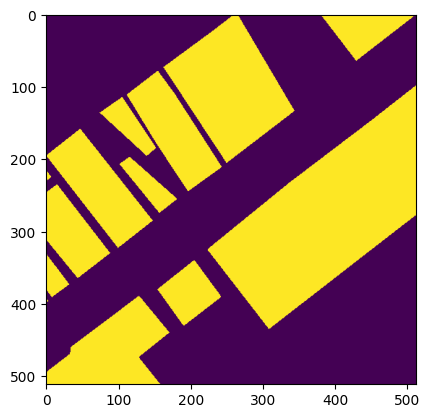

In [216]:
plt.imshow(im)

In [205]:
l_val

7     25
10    39
Name: id, dtype: int64

In [206]:
from transformers import pipeline

In [ ]:
local_model_path = "D:/Github/Block-Detection/SegFormer/out/segformer/checkpoint-15"

image_segmentator = pipeline(
    task="image-segmentation",
    model=local_model_path
)

image = Image.open('D:/Github/Block-Detection/data/raw/data_set_all_512/dataset_x_512/25.png')
result = image_segmentator(image)

# Asegurar lista
if not isinstance(result, list):
    result = [result]

# Tomar primer resultado
r = result[1]

mask = np.array(r["mask"]) > 0   # booleana
color = (255, 0, 0)  # ejemplo: rojo

segmentation_map = np.zeros((*mask.shape, 3), dtype=np.uint8)

for c in range(3):
    segmentation_map[:, :, c] = np.where(mask, color[c], segmentation_map[:, :, c])

img_np = np.array(image)
'''
plt.figure(figsize=(10, 10))
plt.imshow(img_np)
plt.imshow(im)
plt.imshow(segmentation_map, alpha=0.5)
plt.axis('off')
plt.show()
'''
plt.figure(figsize=(10, 10))
plt.imshow(img_np)
plt.imshow(segmentation_map, alpha=0.5)
plt.axis('off')

# Guardar la figura en un archivo
plt.savefig('test.png', bbox_inches='tight', pad_inches=0)
plt.close()

Device set to use cuda:0


In [ ]:
import os
from pathlib import Path
from PIL import Image
import numpy as np
import torch
from transformers import pipeline

# ===================== CONFIGURACIÓN =====================
model_path = r"D:\Github\Block-Detection\SegFormer\out\segformer\checkpoint-15"  # checkpoint local
input_dir  = r"D:\Github\Block-Detection\data\external"   # carpeta de entrada
output_dir = r"D:\Github\Block-Detection\data\processed\segformer\preds"             # carpeta de salida

# Si quieres solo una etiqueta específica (por ejemplo, tu clase positiva):
target_label = "Block"      # pon None para todas las clases
score_threshold = 0.0       # umbral mínimo de score para incluir un segmento (0..1)

# Color por defecto para superposición (si usas 1 clase principal)
default_color = (255, 0, 0) # rojo
alpha = 0.5                 # transparencia de la superposición (0=transparente, 1=opaco)

# Si tienes varias clases y quieres colores distintos, defínelos aquí:
label_to_color = {
    "Block": (255, 0, 0),
    "OtraClase": (0, 255, 0),
}

# Extensiones soportadas
valid_exts = {".png", ".jpg", ".jpeg"}

# ===================== PREPARACIÓN ========================
os.makedirs(output_dir, exist_ok=True)
device = 0 if torch.cuda.is_available() else -1
image_segmentator = pipeline(
    task="image-segmentation",
    model=model_path,
    device=device
)
# ===================== PROCESAMIENTO ======================
input_paths = [p for p in Path(input_dir).glob("*") if p.suffix.lower() in valid_exts]
print(f"Encontradas {len(input_paths)} imágenes en: {input_dir}")
for i, img_path in enumerate(sorted(input_paths)):
    # 1) Cargar imagen
    img = Image.open(str(img_path)).convert("RGB")
    result = image_segmentator(img)
    r = result[1]
    mask = np.array(r["mask"]) > 0 
    color = (255, 0, 0)
    segmentation_map = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for c in range(3):
        segmentation_map[:, :, c] = np.where(mask, color[c], segmentation_map[:, :, c])
    segments = image_segmentator(img)
    #display(segments[1]['mask'])
    #display(img)
        # Estructura: lista de dicts con 'mask', 'label', 'score', etc.
    n = str(img_path).split('\\')[-1]
    w_path = f'{output_dir}/{n}'
    plt.imshow(img)
    plt.imshow(segmentation_map, alpha=0.5)
    #plt.show()
    plt.savefig(w_path, bbox_inches='tight', pad_inches=0)
    plt.close()

Device set to use cuda:0


Encontradas 25 imágenes en: D:\Github\Block-Detection\data\external
D:\Github\Block-Detection\data\external\c1.png
D:\Github\Block-Detection\data\external\c2.png
D:\Github\Block-Detection\data\external\c3.png
D:\Github\Block-Detection\data\external\c4.png
D:\Github\Block-Detection\data\external\c5.png
D:\Github\Block-Detection\data\external\c6.png
D:\Github\Block-Detection\data\external\c7.png
D:\Github\Block-Detection\data\external\c8.png
D:\Github\Block-Detection\data\external\c9.png
D:\Github\Block-Detection\data\external\nc1.png


KeyboardInterrupt: 

In [12]:
import requests
from transformers import pipeline
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [44]:
i = 9
original = f"D:/Github/Block-Detection/data/external/nc{i}.png"

Device set to use cuda:0


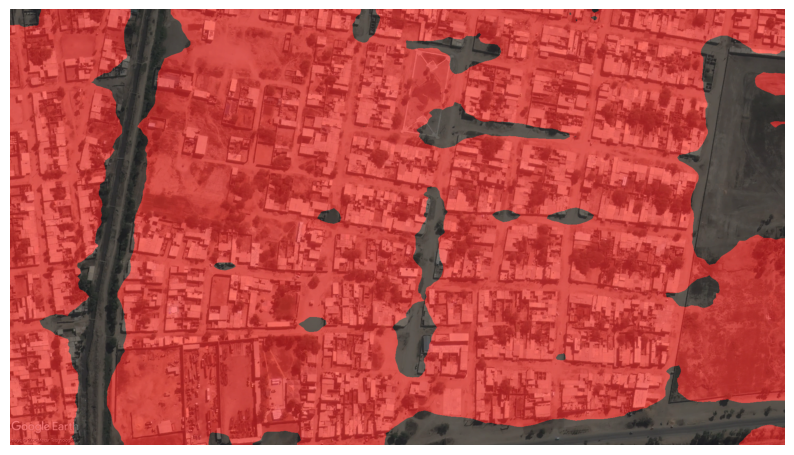

In [45]:
local_model_path = "segformer-finetuned/checkpoint-1080"

image_segmentator = pipeline(
    task="image-segmentation",
    model=local_model_path
)

image = Image.open(original)
result = image_segmentator(image)

# Asegurar lista
if not isinstance(result, list):
    result = [result]

# Tomar primer resultado
r = result[1]

mask = np.array(r["mask"]) > 0   # booleana
color = (255, 0, 0)  # ejemplo: rojo

segmentation_map = np.zeros((*mask.shape, 3), dtype=np.uint8)

for c in range(3):
    segmentation_map[:, :, c] = np.where(mask, color[c], segmentation_map[:, :, c])

img_np = np.array(image)

plt.figure(figsize=(10, 10))
plt.imshow(img_np)
plt.imshow(segmentation_map, alpha=0.5)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(img_np)
plt.imshow(segmentation_map, alpha=0.5)
plt.axis('off')

# Guardar la figura en un archivo
plt.savefig(f"D:/Github/Block-Detection/data/external/segformer/segfomer{i}.png", bbox_inches='tight', pad_inches=0)
plt.close()

Device set to use cuda:0


[{'score': None, 'label': 'unlabeled', 'mask': <PIL.Image.Image image mode=L size=1920x1080 at 0x28D702E2CE0>}, {'score': None, 'label': 'Block', 'mask': <PIL.Image.Image image mode=L size=1920x1080 at 0x28D7101B5B0>}]


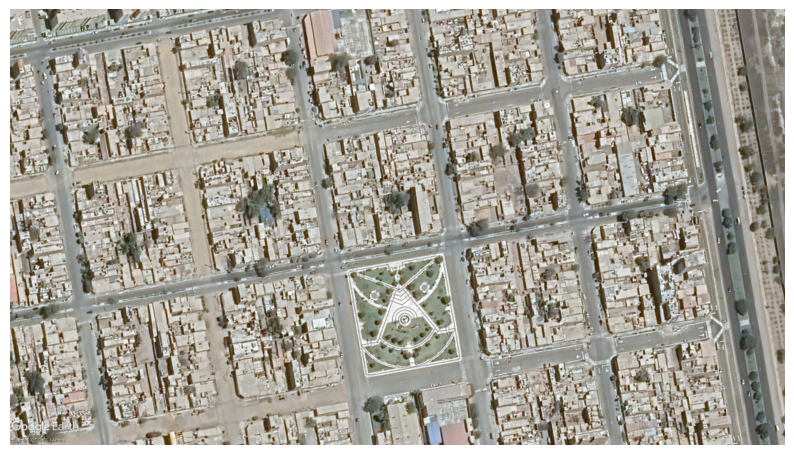

In [46]:
# Prueba 1
local_model_path = "segformer-finetuned/checkpoint-1080"  # Ajusta según tu ruta real

# Crear el pipeline para segmentación de imágenes
image_segmentator = pipeline(
    task="image-segmentation",
    model=local_model_path
)

# Abrir imagen local
from PIL import Image
image_path = "D:/Github/Block-Detection/data/external/nc8.png"  # Cambia por tu imagen
image = Image.open(image_path)

# Realizar la predicción
result = image_segmentator(image)
print(result)

image_array = np.array(image)
segmentation_map = np.zeros_like(image_array)

for result in result:
    mask = np.array(result['mask'])
    label = result['label']

    label_index = list(id2label.values()).index(label)

    color = sidewalk_palette[label_index]

    for c in range(3):
        segmentation_map[:, :, c] = np.where(mask, color[c], segmentation_map[:, :, c])

plt.figure(figsize=(10, 10))
plt.imshow(image_array)
plt.imshow(segmentation_map, alpha=0.5)
plt.axis('off')
plt.show()

In [47]:


ruta_imagen = "prueba.png"
image = Image.open(ruta_imagen)


image_segmentator = pipeline(
    "image-segmentation", model="segformer-finetuned/checkpoint-1080" # Change with your model name
)

results = image_segmentator(image)

FileNotFoundError: [Errno 2] No such file or directory: 'prueba.png'

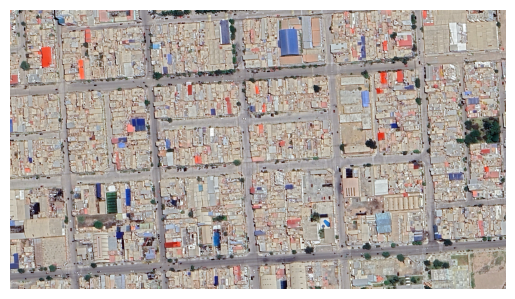

In [ ]:
plt.imshow(image)
plt.axis('off')
plt.show()

The model has generated some masks, so we can visualize them to evaluate and understand its performance. This will help us see how well the model is segmenting the images and identify any areas for improvement.


In [ ]:
id2label

{0: 'unlabeled', 1: 'Block'}

In [ ]:
label

'flat-sidewalk'

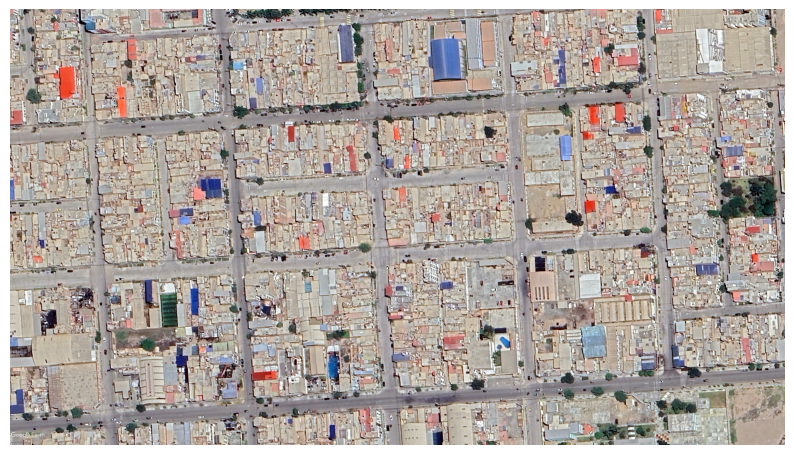

In [ ]:
image_array = np.array(image)

segmentation_map = np.zeros_like(image_array)

for result in results:
    mask = np.array(result['mask'])
    label = result['label']

    label_index = list(id2label.values()).index(label)

    color = sidewalk_palette[label_index]

    for c in range(3):
        segmentation_map[:, :, c] = np.where(mask, color[c], segmentation_map[:, :, c])

plt.figure(figsize=(10, 10))
plt.imshow(image_array)
plt.imshow(segmentation_map, alpha=0.5)
plt.axis('off')
plt.show()

## 11. Evaluate Performance on the Test Set 📊


## 12. Access the Model Using the Inference API and Visualize Results 🔌


Hugging Face 🤗 provides a [Serverless Inference API](https://huggingface.co/docs/api-inference/index) that allows you to test models directly via API endpoints for free. For detailed guidance on using this API, check out this [cookbook](https://huggingface.co/learn/cookbook/enterprise_hub_serverless_inference_api).

We will use this API to explore its functionality and see how it can be leveraged for testing our model.

**IMPORTANT**

Before using the Serverless Inference API, you need to set the model task by creating a model card. When creating the model card for your fine-tuned model, ensure that you specify the task appropriately.

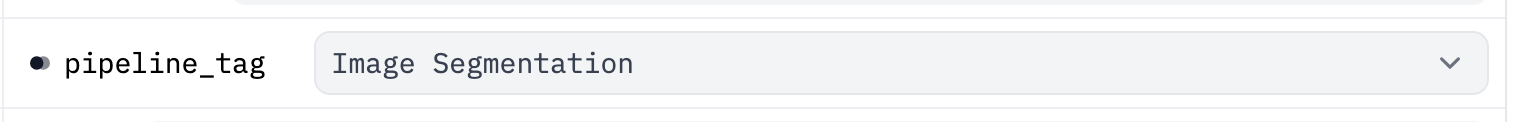


Once the model task is set up, we can download an image and use the [InferenceClient](https://huggingface.co/docs/huggingface_hub/v0.25.0/en/package_reference/inference_client) to test the model. This client will allow us to send the image to the model through the API and retrieve the results for evaluation.


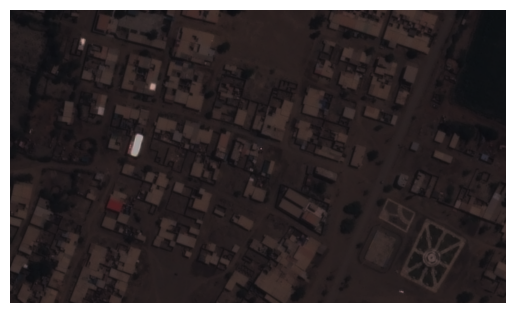

In [ ]:
#url = "https://images.unsplash.com/photo-1594098742644-314fedf61fb6?q=80&w=2672&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
#image = Image.open(requests.get(url, stream=True).raw)
ruta_imagen = "prueba3.png"  # Cambia por la ruta real

# Abrir la imagen
image = Image.open(ruta_imagen)
plt.imshow(image)
plt.axis('off')
plt.show()

We will use the [image_segmentation](https://huggingface.co/docs/huggingface_hub/v0.25.0/en/package_reference/inference_client#huggingface_hub.InferenceClient.image_segmentation) method from the InferenceClient. This method takes the model and an image as inputs and returns the predicted masks. This will allow us to test how well the model performs on new images.


In [ ]:
[x for x in jsons[jsons['num_polygons_in_window']==1]['id']]

[1091,
 117,
 118,
 1184,
 127,
 1280,
 131,
 1472,
 153,
 154,
 1566,
 157,
 1571,
 1572,
 160,
 1663,
 169,
 1731,
 1733,
 1734,
 1735,
 1797,
 1799,
 1828,
 1831,
 1856,
 1858,
 1896,
 1927,
 1952,
 1953,
 196,
 197,
 199,
 1990,
 1991,
 2016,
 203,
 204,
 2048,
 2049,
 205,
 206,
 2085,
 2086,
 2087,
 210,
 2143,
 215,
 2182,
 2183,
 2209,
 2217,
 2238,
 2239,
 2240,
 2277,
 2304,
 2334,
 2335,
 2367,
 2405,
 2406,
 2429,
 2430,
 246,
 2462,
 2464,
 2495,
 2525,
 2526,
 2527,
 257,
 2591,
 2620,
 2652,
 2690,
 2715,
 2720,
 2721,
 2747,
 2879,
 2880,
 2905,
 2914,
 2976,
 2979,
 3002,
 305,
 3069,
 3073,
 3107,
 3168,
 3203,
 3204,
 3221,
 3231,
 3232,
 3256,
 3263,
 3350,
 3387,
 3394,
 3395,
 3414,
 3445,
 3446,
 3455,
 3541,
 3580,
 3607,
 3608,
 3611,
 362,
 3704,
 3705,
 3732,
 3828,
 3829,
 4005,
 4007,
 4008,
 4100,
 4103,
 4199,
 426,
 428,
 4290,
 4391,
 4848,
 4857,
 5039,
 5134,
 5135,
 5138,
 5419,
 556,
 5611,
 563,
 5712,
 5803,
 5807,
 5997,
 6089,
 6092,
 6093,
 624

Device set to use cuda:0


[{'score': None, 'label': 'unlabeled', 'mask': <PIL.Image.Image image mode=L size=256x256 at 0x2C030402890>}, {'score': None, 'label': 'Block', 'mask': <PIL.Image.Image image mode=L size=256x256 at 0x2C030401EA0>}]


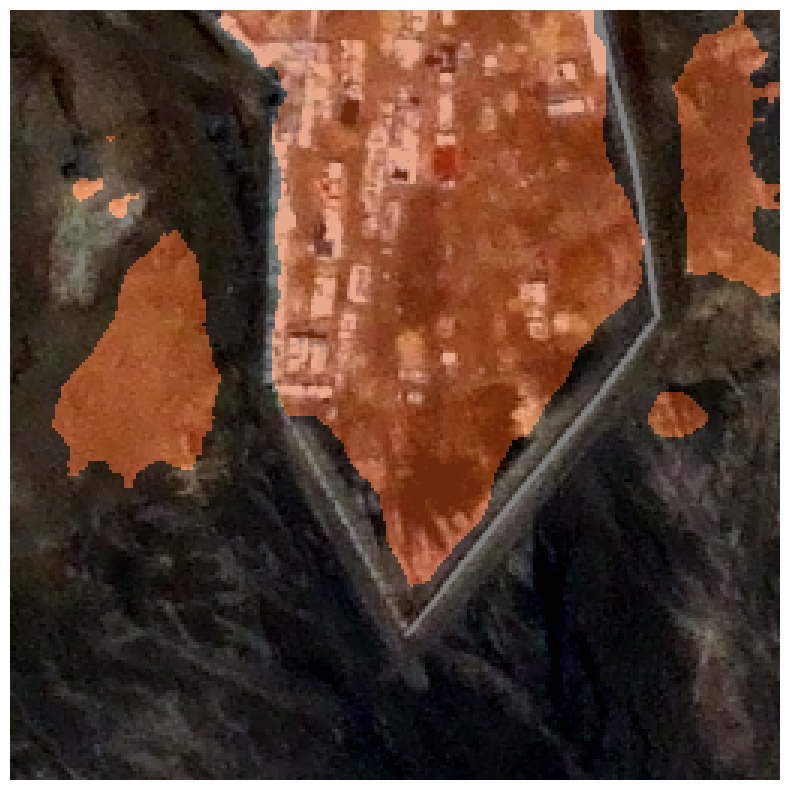

In [ ]:
from transformers import pipeline

# Ruta al modelo entrenado localmente
local_model_path = "segformer-finetuned/checkpoint-1080"  # Ajusta según tu ruta real

# Crear el pipeline para segmentación de imágenes
image_segmentator = pipeline(
    task="image-segmentation",
    model=local_model_path
)

# Abrir imagen local
from PIL import Image
image_path = "data/images/5807.png"  # Cambia por tu imagen
image = Image.open(image_path)

# Realizar la predicción
result = image_segmentator(image)
print(result)

image_array = np.array(image)
segmentation_map = np.zeros_like(image_array)

for result in result:
    mask = np.array(result['mask'])
    label = result['label']

    label_index = list(id2label.values()).index(label)

    color = sidewalk_palette[label_index]

    for c in range(3):
        segmentation_map[:, :, c] = np.where(mask, color[c], segmentation_map[:, :, c])

plt.figure(figsize=(10, 10))
plt.imshow(image_array)
plt.imshow(segmentation_map, alpha=0.5)
plt.axis('off')
plt.show()

In [ ]:
from transformers import pipeline, AutoConfig
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Device set to use cuda:0


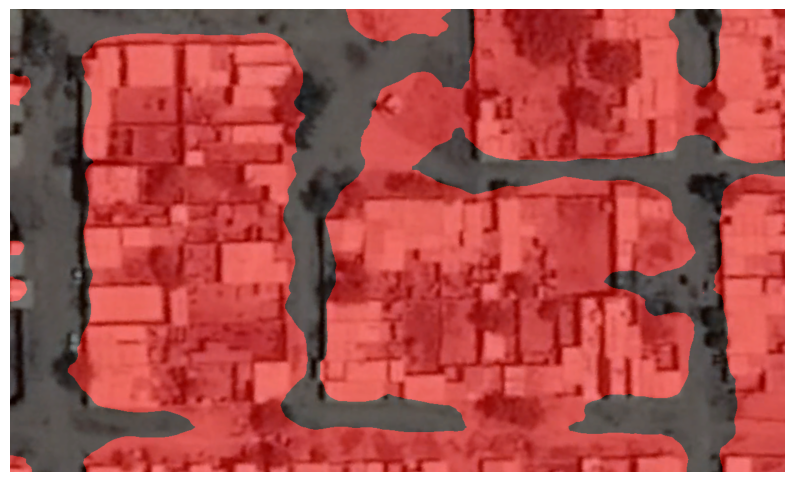

In [ ]:
local_model_path = "segformer-finetuned/checkpoint-1080"

image_segmentator = pipeline(
    task="image-segmentation",
    model=local_model_path
)

image = Image.open("prueba8.png")
result = image_segmentator(image)

# Asegurar lista
if not isinstance(result, list):
    result = [result]

# Tomar primer resultado
r = result[1]

mask = np.array(r["mask"]) > 0   # booleana
color = (255, 0, 0)  # ejemplo: rojo

segmentation_map = np.zeros((*mask.shape, 3), dtype=np.uint8)

for c in range(3):
    segmentation_map[:, :, c] = np.where(mask, color[c], segmentation_map[:, :, c])

img_np = np.array(image)

plt.figure(figsize=(10, 10))
plt.imshow(img_np)
plt.imshow(segmentation_map, alpha=0.5)
plt.axis('off')
plt.show()

In [ ]:
result

[{'score': None,
  'label': 'unlabeled',
  'mask': <PIL.Image.Image image mode=L size=1525x915>},
 {'score': None,
  'label': 'Block',
  'mask': <PIL.Image.Image image mode=L size=1525x915>}]

With the predicted masks, we can display the results.

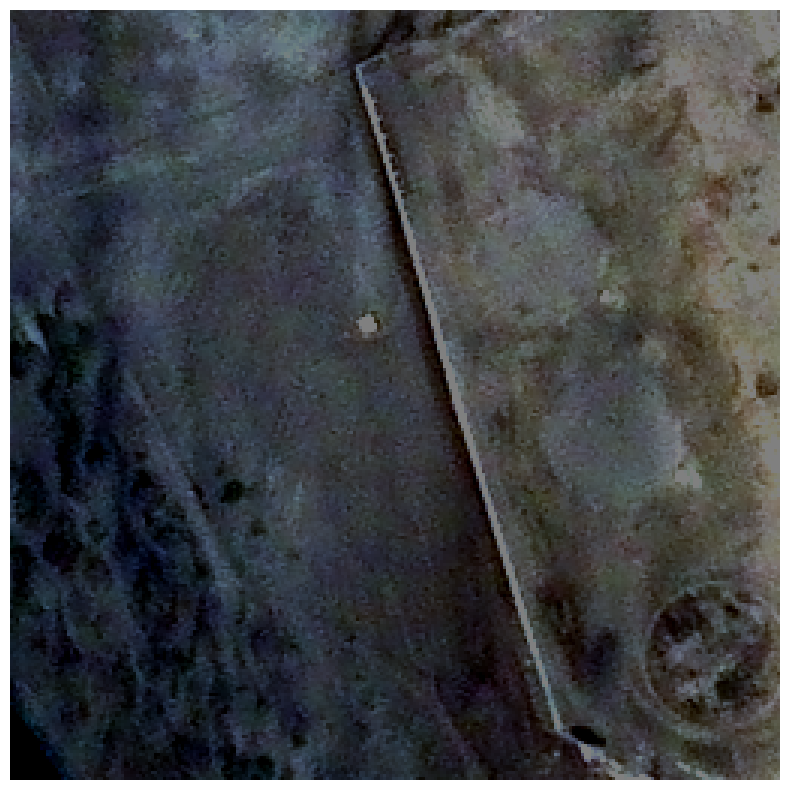

In [ ]:
image_array = np.array(image)
segmentation_map = np.zeros_like(image_array)

for result in result:
    mask = np.array(result['mask'])
    label = result['label']

    label_index = list(id2label.values()).index(label)

    color = sidewalk_palette[label_index]

    for c in range(3):
        segmentation_map[:, :, c] = np.where(mask, color[c], segmentation_map[:, :, c])

plt.figure(figsize=(10, 10))
plt.imshow(image_array)
plt.imshow(segmentation_map, alpha=0.5)
plt.axis('off')
plt.show()

It’s also possible to use the [Inference API with JavaScript](https://huggingface.co/tasks/image-segmentation). Here’s an example of how you can consume the API using JavaScript:

```
import { HfInference } from "@huggingface/inference";

const inference = new HfInference(HF_TOKEN);
await inference.imageSegmentation({
    data: await (await fetch("https://picsum.photos/300/300")).blob(),
    model: "sergiopaniego/segformer-b0-segments-sidewalk-finetuned",
});

```



**Extra Points**

You can also deploy the fine-tuned model using a Hugging Face Space. For example, I have created a custom Space to showcase this: [Semantic Segmentation with SegFormer Fine-Tuned on Segments/Sidewalk](https://huggingface.co/spaces/sergiopaniego/segformer-b0-segments-sidewalk-finetuned).

<img src="https://huggingface.co/front/thumbnails/spaces.png" alt="HF Spaces logo" width="20%">


In [ ]:
from IPython.display import IFrame
IFrame(src='https://sergiopaniego-segformer-b0-segments-sidewalk-finetuned.hf.space', width=1000, height=800)

## Conclusion

In this guide, we successfully fine-tuned a semantic segmentation model on a custom dataset and utilized the Serverless Inference API to test it. This demonstrates how easily you can integrate the model into various applications and leverage Hugging Face tools for deployment.

I hope this guide provides you with the tools and knowledge to confidently fine-tune and deploy your own models! 🚀